Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

Input Features : 'Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'
Output : 'Attrition'

With given Input features we need create a ML model to predict Attrition in a company. 

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Mean Age of employees is 36.9, standard deviation is 9.13, minimum age age is 18 and maximum is 60 years. 
Similarly we an understand certain other inputs such as Total working years where mean is 11.27 and maximum working years for an employee is 40 years.

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

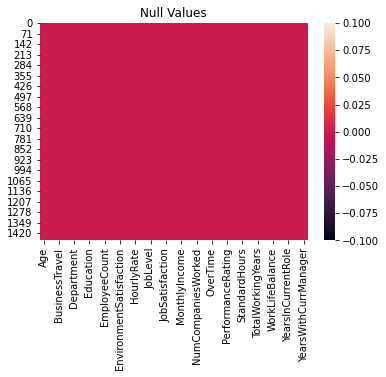

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

There are no null values in the dataset.

# Data Visualisation

1470


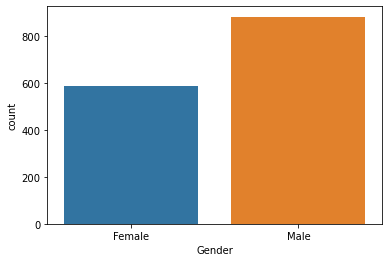

In [12]:
ax=sns.countplot(x='Gender',data=df)
print(df['Gender'].count())

There are more than 800 Male Employees and slightly less than 600 Female Employees.

In [14]:
index =['Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

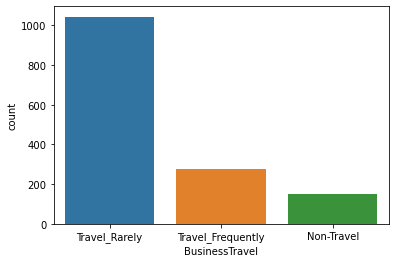

In [19]:
ax=sns.countplot(x= 'BusinessTravel', data=df)

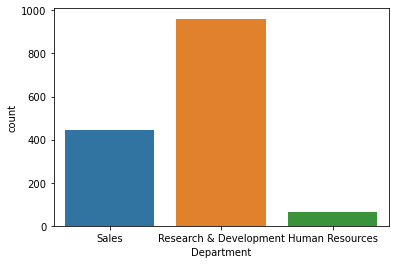

In [20]:
ax=sns.countplot(x= 'Department', data=df)

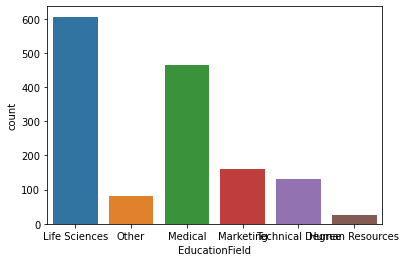

In [24]:
ax=sns.countplot(x= 'EducationField', data=df)

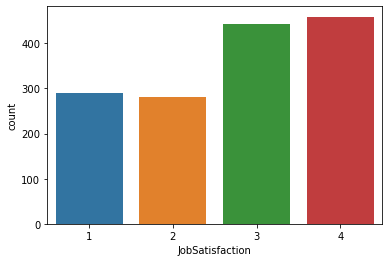

In [25]:
ax=sns.countplot(x= 'JobSatisfaction', data=df)

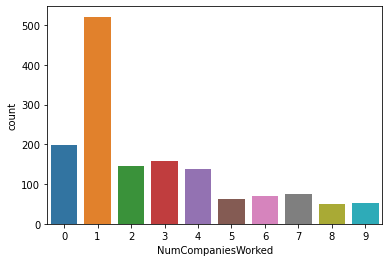

In [26]:
ax=sns.countplot(x= 'NumCompaniesWorked', data=df)

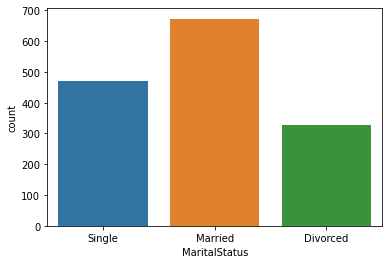

In [27]:
ax=sns.countplot(x= 'MaritalStatus', data=df)

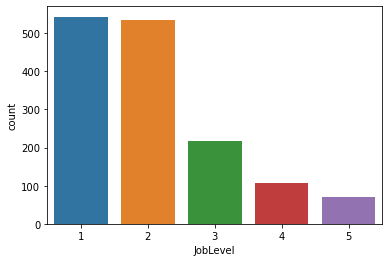

In [37]:
ax=sns.countplot(x= 'JobLevel', data=df)

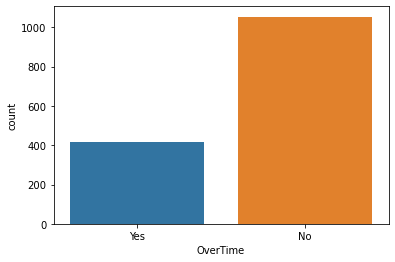

In [44]:
ax=sns.countplot(x= 'OverTime', data=df)

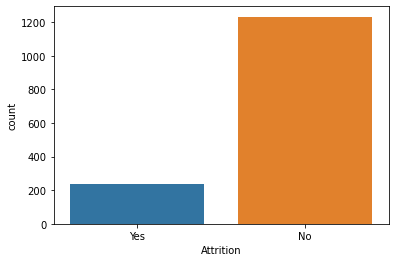

In [46]:
ax=sns.countplot(x= 'Attrition', data=df)

In [42]:
index=['MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

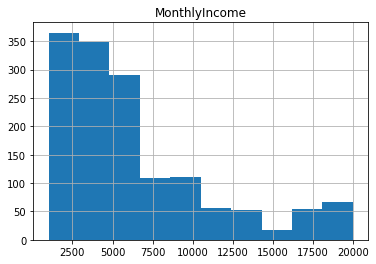

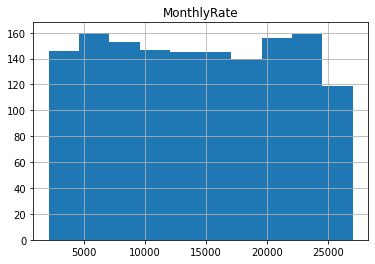

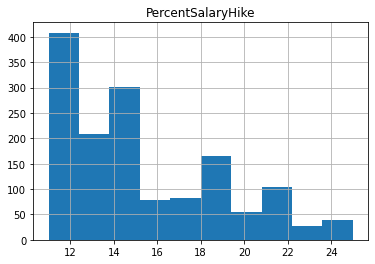

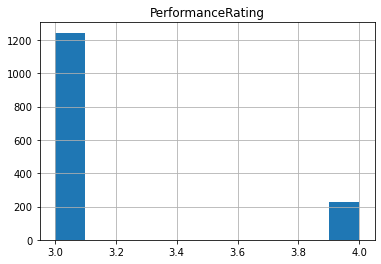

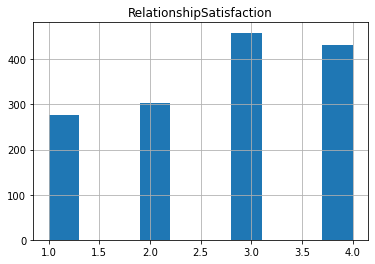

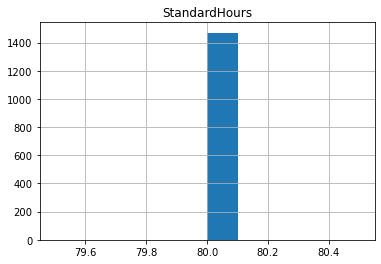

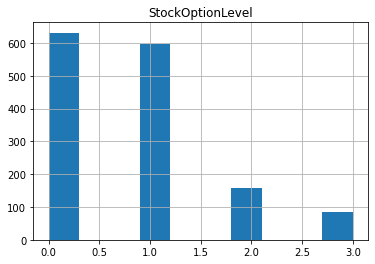

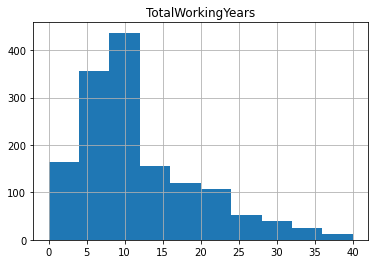

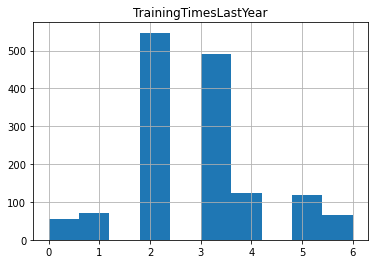

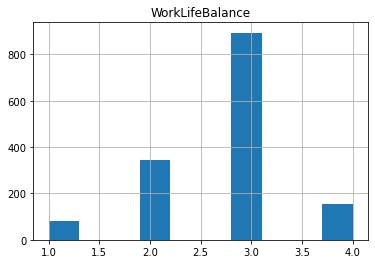

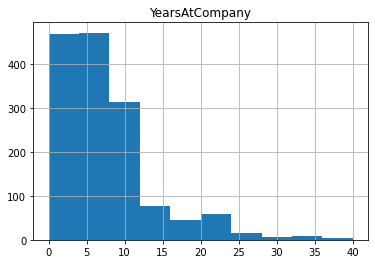

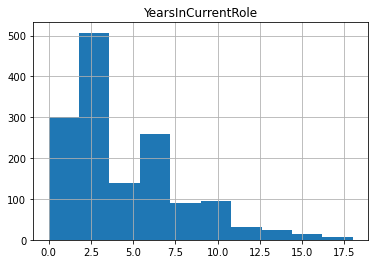

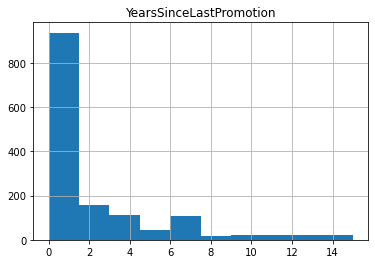

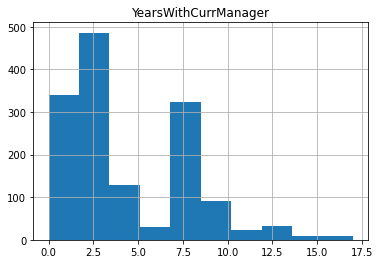

In [43]:
for i in index:
    df[i].hist(grid=True)
    plt.title(i)
    plt.show()

Different histograms showing distribution of Monthly Income, Monthly Rate, Percentage Salary Hike, Performance Rating, Relationship Satisfaction, Standard Hours, Stock Option Level, Total Working Years, Training Times Last Year, Work Life Balance, Years At Company, Years In Current Role, Years Since Last Promotion, Years With Current Manager

# Observation

In [ ]:
df= df.drop(['EmployeeCount'],axis=1)

In [62]:
df= df.drop(['EmployeeNumber'],axis=1)

# Encoding the data

In [63]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [64]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

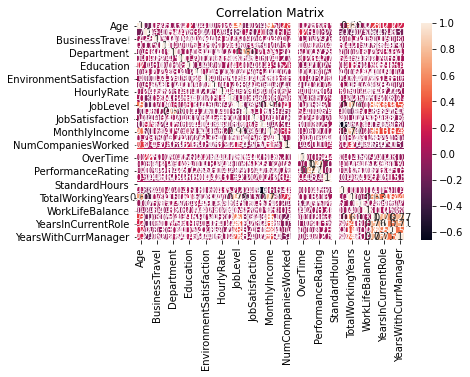

In [65]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [66]:
corr_matrix=df.corr()
corr_matrix['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

In [67]:
df.dropna()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1.0,2.0,1102,2.0,1,2,1.0,2,0.0,...,1,80,0,8,0,1,6,4,0,5
1,49,0.0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,80,1,10,3,3,10,7,1,7
2,37,1.0,2.0,1373,1.0,2,2,4.0,4,1.0,...,2,80,0,7,3,3,0,0,0,0
3,33,0.0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,80,0,8,3,3,8,7,3,0
4,27,0.0,2.0,591,1.0,2,1,3.0,1,1.0,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0.0,1.0,884,1.0,23,2,3.0,3,1.0,...,3,80,1,17,3,3,5,2,0,3
1466,39,0.0,2.0,613,1.0,6,1,3.0,4,1.0,...,1,80,1,9,5,3,7,7,1,7
1467,27,0.0,2.0,155,1.0,4,3,1.0,2,1.0,...,2,80,1,6,0,3,6,2,0,3
1468,49,0.0,1.0,1023,2.0,2,3,3.0,4,1.0,...,4,80,0,17,3,2,9,6,0,8


In [68]:
corr_matrix=df.corr()
corr_matrix['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

In [57]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

In [69]:
x=df.drop('Attrition', axis =1)
y=df['Attrition']

In [70]:
from sklearn.preprocessing import power_transform
df.new=power_transform(x)

df.new=pd.DataFrame(df.new,columns=x.columns)

In [71]:
df.new.skew()

Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.193634
StandardHours               0.000000
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
W

In [72]:
x=df.new

# Checking for Outliers

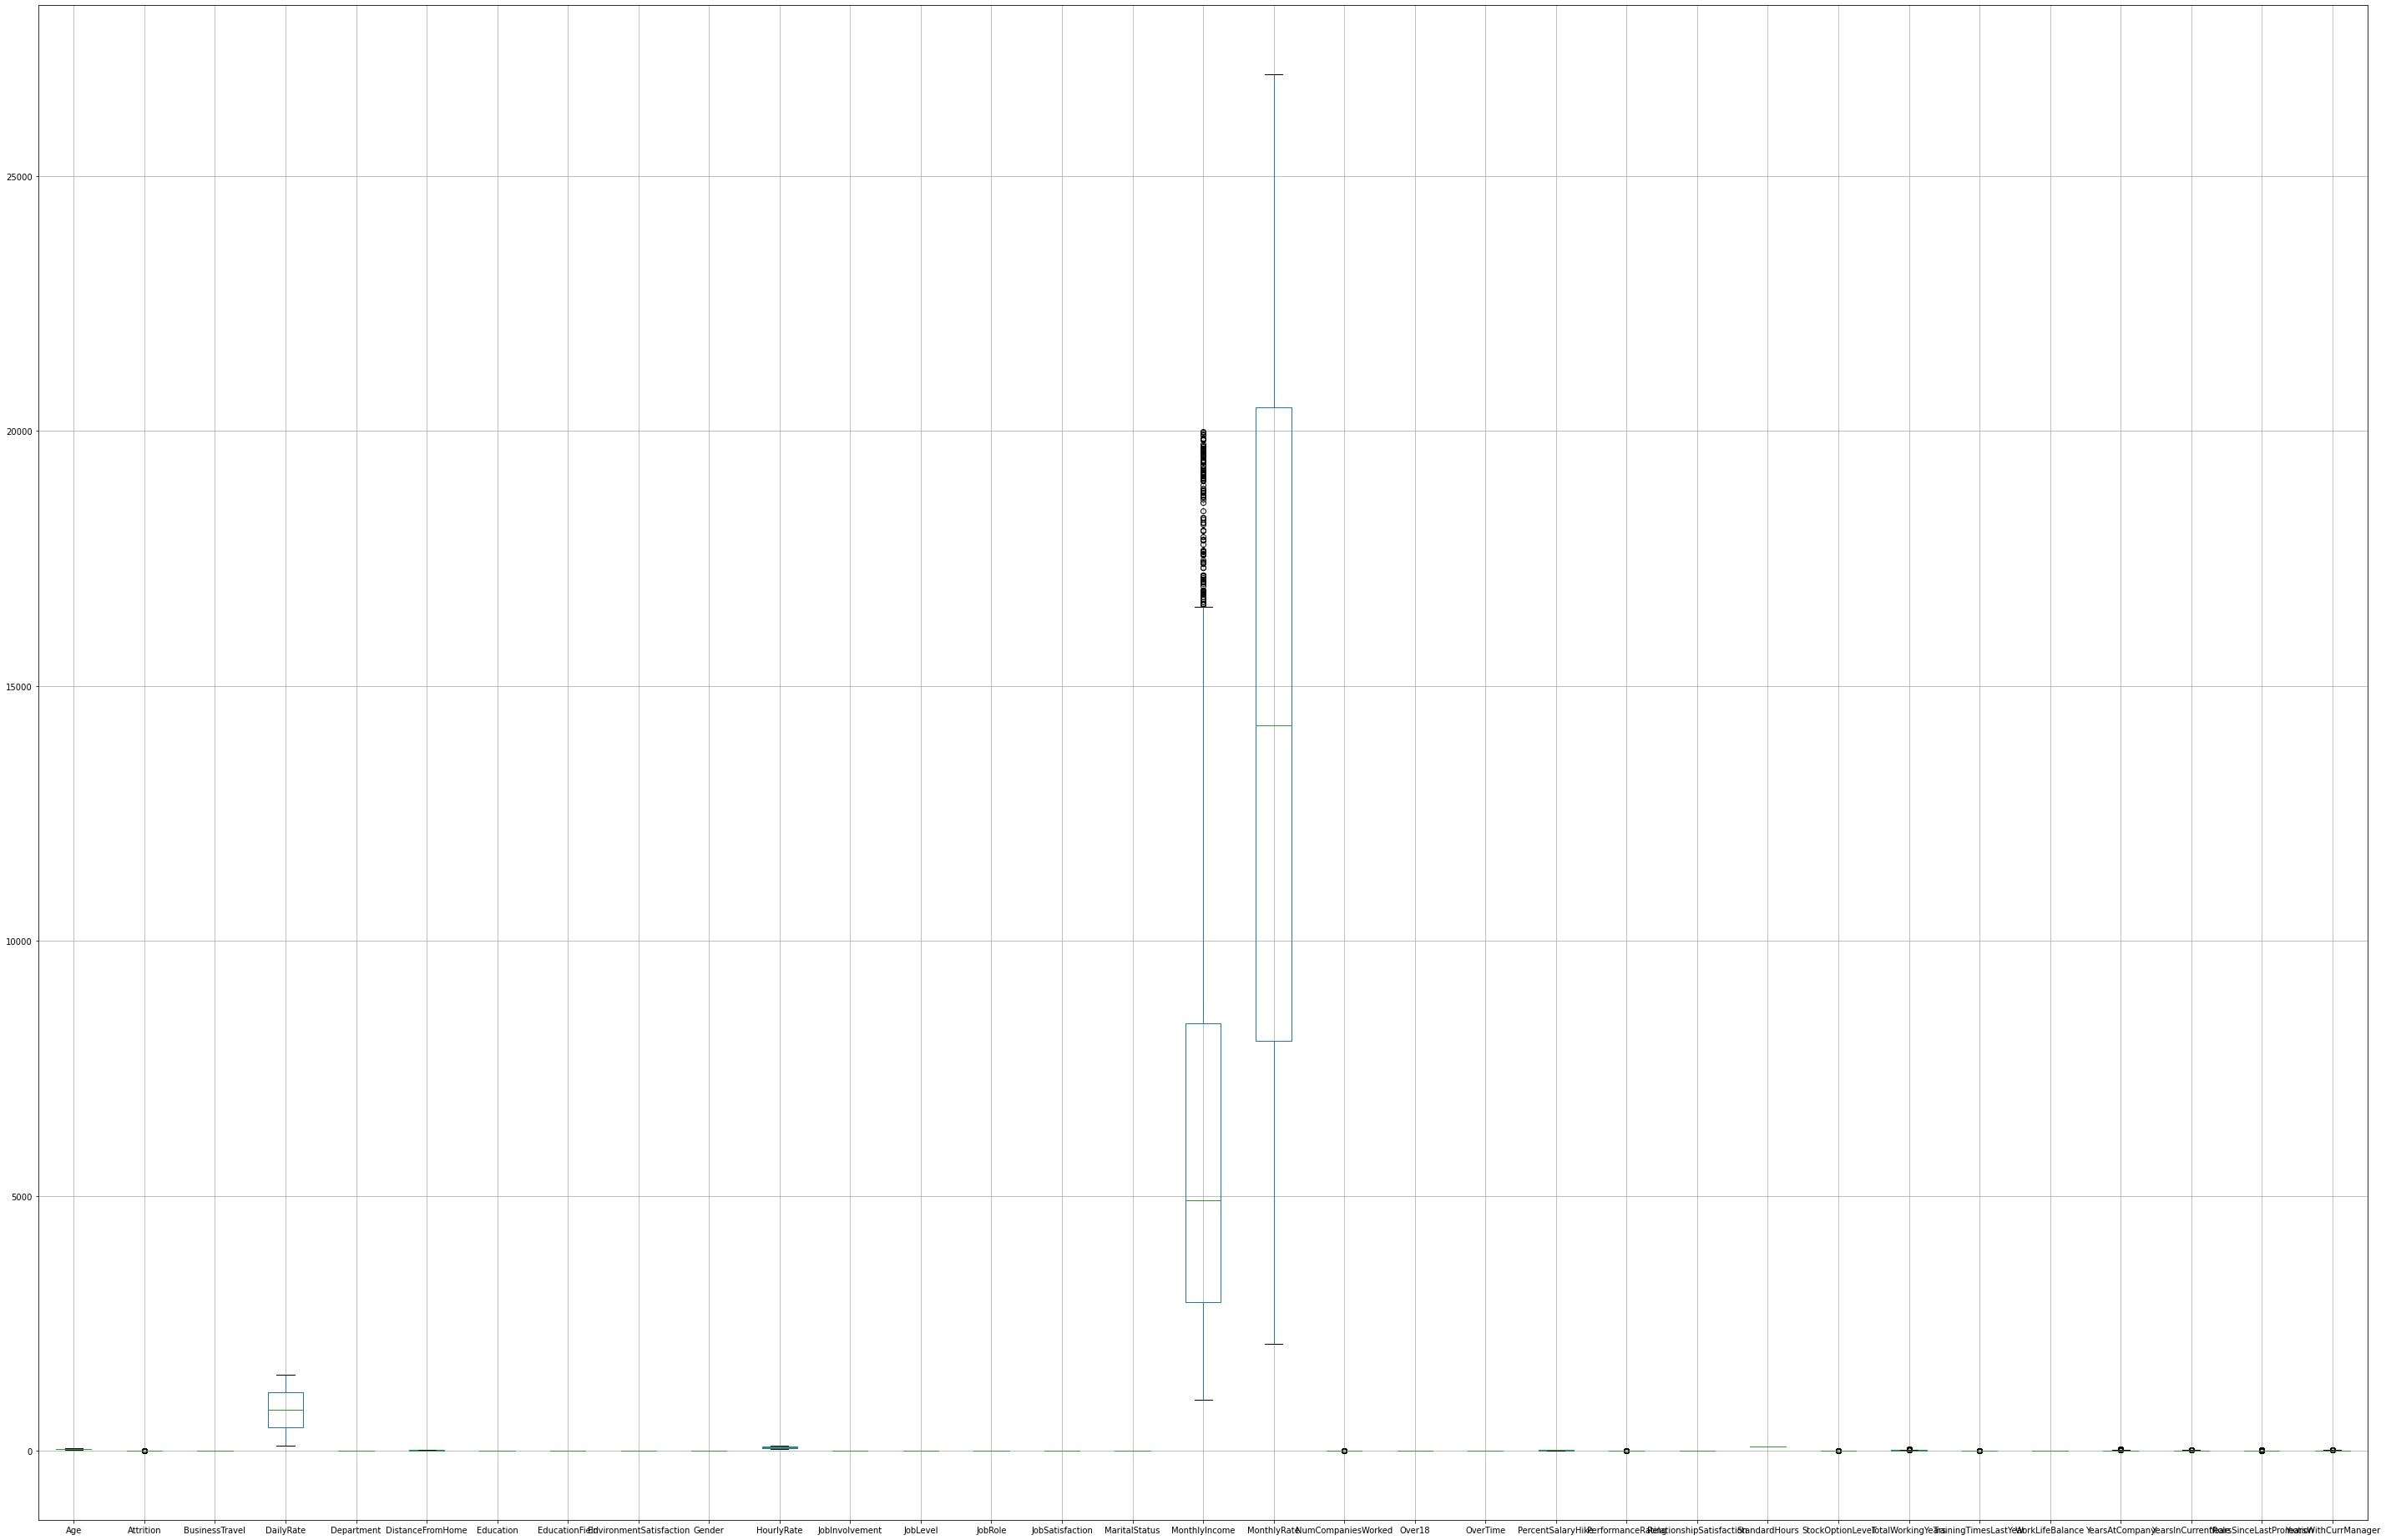

In [76]:
df.boxplot(figsize=[50,40])
plt.subplots_adjust(bottom=.25)
plt.show()

# Finding best random_state

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
maxAccu=0
maxRS=0

In [82]:
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    predrf=rf.predict(x_test) 
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is ", maxAccu," on Random_state ", maxRS)

Best accuracy is  0.9002267573696145  on Random_state  26


# Creating train test split

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=26)

In [86]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
LR.score(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8979591836734694
[[372   9]
 [ 36  24]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       381
         1.0       0.73      0.40      0.52        60

    accuracy                           0.90       441
   macro avg       0.82      0.69      0.73       441
weighted avg       0.89      0.90      0.88       441



In [87]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8027210884353742
[[327  54]
 [ 33  27]]
              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88       381
         1.0       0.33      0.45      0.38        60

    accuracy                           0.80       441
   macro avg       0.62      0.65      0.63       441
weighted avg       0.83      0.80      0.81       441



In [88]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8866213151927438
[[379   2]
 [ 48  12]]
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       381
         1.0       0.86      0.20      0.32        60

    accuracy                           0.89       441
   macro avg       0.87      0.60      0.63       441
weighted avg       0.88      0.89      0.85       441



In [89]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.9024943310657596
[[376   5]
 [ 38  22]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       381
         1.0       0.81      0.37      0.51        60

    accuracy                           0.90       441
   macro avg       0.86      0.68      0.73       441
weighted avg       0.90      0.90      0.89       441



# Cross Validation

In [90]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print('Cross validation score of LinearRegression model :',scr.mean())

Cross validation score of LinearRegression model : 0.8687074829931973


In [91]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(dtc, x, y, cv=5)
print('Cross validation score of DecissionTreeClassifier model :',scr.mean())

Cross validation score of DecissionTreeClassifier model : 0.7782312925170067


In [92]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(rf, x, y, cv=5)
print('Cross validation score of RandomForestClassifier model :',scr.mean())

Cross validation score of RandomForestClassifier model : 0.8585034013605443


In [93]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(svc, x, y, cv=5)
print('Cross validation score of SVC model :',scr.mean())

Cross validation score of SVC model : 0.8646258503401361


Minimum difference in accuracy and cross validation is for RandomForestClassifier model.
Hence RandomForestClassifier is our best model.

# Hyper Parameter Tuning

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
parameters= {'max_depth':np.arange(2,15),
            'criterion':['gini','entropy']}

In [97]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [98]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [99]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [100]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [101]:
accuracy_score(y_test,GCV_pred)

0.8979591836734694

In [104]:
import pickle 
filename = 'HRAnalytics_Project.pkl'
pickle.dump(rf, open( filename, 'wb' ))